Data preprocessing and cleaning is an important step before any text mining task. I will remove the punctuations, stopwords and normalize the reviews as much as possible. After every preprocessing step, it is a good practice to check the most frequent words in the data. Therefore, let’s define a function that would plot a bar graph of n most frequent words in the data.

# libraries

In [20]:
#ibraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.corpus import stopwords 
import re
import spacy
import gensim
from gensim import corpora
import pyLDAvis.gensim


In [21]:
!python -m spacy download en # one time run


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:


# Load the DataFrame
df = pd.read_csv("D:/FALL 2023/PROJECTS-INFO/Project-topic modelling/Reviews.csv")
df.info



<bound method DataFrame.info of           Id   ProductId          UserId                      ProfileName  \
0          1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1          2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2          3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3          4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4          5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...      ...         ...             ...                              ...   
19993  19994  B002C50X1M  A220PJBDV3DJG9                Patricia A. Brown   
19994  19995  B002C50X1M  A1AZ1NXGGP6LDX  Christine Parker "Love to Read"   
19995  19996  B002C50X1M  A1XRXZI5KOMVDD            KAF1958 "amandaf0626"   
19996  19997  B002C50X1M   A7G9M0IE7LABX                            Kevin   
19997  19998  B002C50X1M  A38J5PRUDESMZF                              ray   

       HelpfulnessNumerator  HelpfulnessDen

# Data PreProcessing

Converting Unix timestamps (e.g., "1303862400") to a human-readable date and time format.

In [23]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df.head

<bound method NDFrame.head of           Id   ProductId          UserId                      ProfileName  \
0          1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1          2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2          3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3          4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4          5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...      ...         ...             ...                              ...   
19993  19994  B002C50X1M  A220PJBDV3DJG9                Patricia A. Brown   
19994  19995  B002C50X1M  A1AZ1NXGGP6LDX  Christine Parker "Love to Read"   
19995  19996  B002C50X1M  A1XRXZI5KOMVDD            KAF1958 "amandaf0626"   
19996  19997  B002C50X1M   A7G9M0IE7LABX                            Kevin   
19997  19998  B002C50X1M  A38J5PRUDESMZF                              ray   

       HelpfulnessNumerator  HelpfulnessDenom

# Data Cleaning

In [24]:
#  function for text preprocessing
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub("[^a-zA-Z]", " ", text).lower()
    # Remove stopwords and short words (length < 3)
    text = ' '.join([word for word in text.split() if word not in stop_words and len(word) > 2])
    return text

# Initializing stopwords
stop_words = set(stopwords.words('english'))

# Applying text preprocessing to the 'Text' column
df['Text'] = df['Text'].apply(preprocess_text)

print(df.head(5))

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score       Time  \
0                     1                       1      5 2011-04-27   
1                     0                       0      1 2012-09-07   
2                     1                       1      4 2008-08-18   
3                     3                       3      2 2011-06-13   
4                     0                       0      5 2012-10-21   

                 Summary                                               Text  
0  Good Quality Dog Food  bought several vitality canned dog food produc...  
1      N

# Frequency of Terms

In [26]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


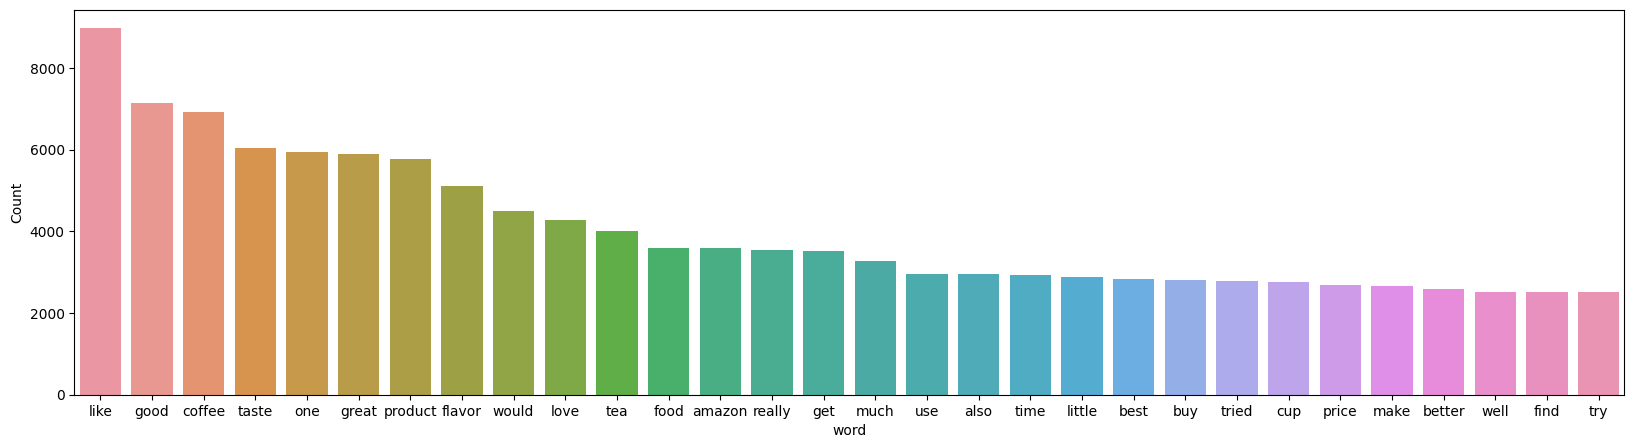

In [27]:
freq_words(df["Text"])

# Tokenizing

In [30]:
#tokenizing the reviews and then lemmatizing the tokenized reviews
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for text in texts:
        doc = nlp(text)
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output


In [31]:
# Tokenize the reviews
tokenized_reviews = [review.split() for review in df["Text"]]

**LEMMATIZATION**

In [32]:
reviews_2 = lemmatization(df["Text"], tags=['NOUN', 'ADJ'])

['product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanuts', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo']
['product', 'jumbo', 'peanut', 'peanut', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'product', 'jumbo']


C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


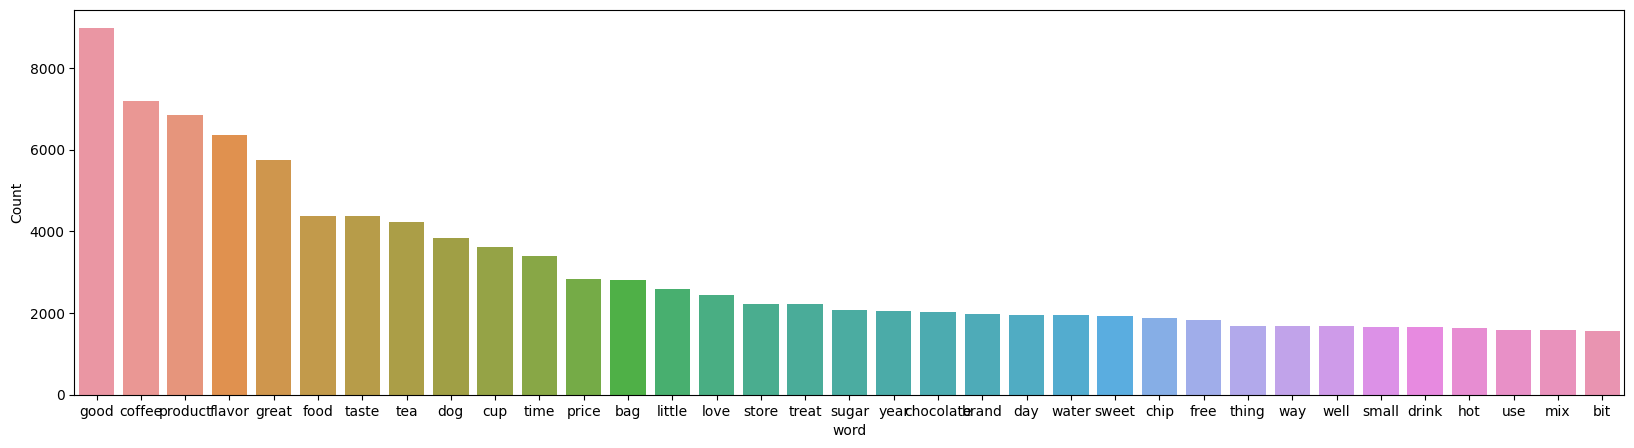

In [33]:
print(tokenized_reviews[1])
print(reviews_2[1])

#de-tokenizing the lemmatized reviews and ploting the most common words
reviews_3 = [' '.join(review) for review in reviews_2]
df["Text"]=reviews_3
freq_words(df['Text'], 35)

In [34]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)
     

In [35]:
# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
     

In [36]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
     

In [37]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=10, 
                random_state=100,
                chunksize=1000,
                passes=50)
     


     

In [38]:
lda_model.print_topics()

[(0,
  '0.028*"bar" + 0.022*"candy" + 0.021*"syrup" + 0.012*"good" + 0.012*"time" + 0.012*"energy" + 0.012*"plant" + 0.011*"stuff" + 0.011*"tooth" + 0.011*"little"'),
 (1,
  '0.122*"coffee" + 0.062*"cup" + 0.029*"flavor" + 0.027*"good" + 0.020*"strong" + 0.016*"taste" + 0.014*"blend" + 0.014*"great" + 0.011*"roast" + 0.011*"morning"'),
 (2,
  '0.081*"dog" + 0.069*"food" + 0.045*"treat" + 0.019*"old" + 0.018*"organic" + 0.015*"baby" + 0.015*"cat" + 0.013*"year" + 0.012*"good" + 0.011*"ingredient"'),
 (3,
  '0.037*"mix" + 0.035*"good" + 0.029*"great" + 0.025*"hot" + 0.019*"sauce" + 0.018*"product" + 0.014*"use" + 0.013*"meat" + 0.013*"year" + 0.013*"love"'),
 (4,
  '0.038*"flavor" + 0.029*"snack" + 0.029*"chip" + 0.027*"good" + 0.025*"salt" + 0.025*"great" + 0.022*"bag" + 0.016*"taste" + 0.014*"love" + 0.013*"cheese"'),
 (5,
  '0.028*"sugar" + 0.026*"flavor" + 0.025*"water" + 0.023*"taste" + 0.022*"butter" + 0.021*"drink" + 0.020*"juice" + 0.018*"peanut" + 0.018*"oil" + 0.018*"sweet"'),


In [39]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.068799 -0.144375       1        1  19.216420
5      0.062118 -0.024824       2        1  15.053307
1      0.110611  0.009589       3        1  13.114990
2     -0.012755 -0.182732       4        1  12.118954
4      0.129489 -0.032112       5        1   9.247198
3      0.051206 -0.068980       6        1   7.903528
0     -0.037752 -0.119115       7        1   6.981543
6      0.041942  0.165446       8        1   5.997276
7      0.128370  0.272283       9        1   5.319337
8     -0.404431  0.124820      10        1   5.047448, topic_info=         Term         Freq        Total Category  logprob  loglift
233    coffee  7124.000000  7124.000000  Default  30.0000  30.0000
624       tea  4601.000000  4601.000000  Default  29.0000  29.0000
0         dog  4363.000000  4363.000000  Default  28.0000  28.0000
319       cup  3622.000000  3622.000000  Default  27.0000  27.0000
1        food  4395.000000  4395.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1078     name   147.920527   337.590162  Topic10  -5.0272   2.1611
393     money   163.011639   601.370343  Topic10  -4.9301   1.6809
1300  website   130.481069   251.199069  Topic10  -5.1527   2.3313
145   package   149.813341  1034.058674  Topic10  -5.0145   1.0544
391     order   150.926153  1335.271002  Topic10  -5.0071   0.8062

[582 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2070      3  0.222840        acid
2070      7  0.769811        acid
3516      9  0.994764      acidic
2013     10  0.990484   addictive
2360      9  0.991837  additional
...     ...       ...         ...
137       1  0.293404        year
137       3  0.061695        year
137       4  0.339558        year
137       6  0.217581        year
137       8  0.087597        year

[919 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 2, 3, 5, 4, 1, 7, 8, 9])